In [67]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [68]:
df=pd.read_csv('../data/WA_FnUseC_TelcoCustomerChurn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Deskripsi columns:
1. customerID: Customer ID
2. gender: jenis kelamin
3. SeniorCitizen: customernya senior atau bukan
4. Partner: Memiliki pasangan atau tidak
5. Dependents: memiliki tanggungan atau tidak
6. tenure: Total bulan customer stay di company
7. PhoneService: layanan telepon
8. MultipleLines: Banyak saluran pelanggan
9. InternetService : penyedia layanan internet
10. OnlineSecurity: keamanan online
11. OnlineBackup: cadangan online
12. DeviceProtection: perlindungan perangkat
13. TechSupport : Memiliki dukungan teknis 
14. StreamingTV
15. StreamingMovies
16. Contract: jangka kontrak
17. PaperlessBilling : tanggihan tanpa kertas
18. PaymentMethod : Electronic check, Mailed check, Bank transfer (automatic), Credit card
19. MonthlyCharges : Tanggungan perbulan
20. TotalCharges : Total tanggungan
21.  Churn

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Preprocessing

In [70]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)
df['TotalCharges']=df['TotalCharges'].astype(float)

In [71]:
#check missing value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [72]:
#handling missing value
df=df.dropna()

In [73]:
#check duplicate
df.duplicated().sum()

0

# EDA

In [74]:
#Statistical summary
numericals=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
categoricals=['gender','Partner','Dependents','PhoneService','MultipleLines',
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
    'PaymentMethod','Churn']
df[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observasi:
- rata-rata customernya bukan senior
- rata-rata customer bertahan di perusahaan 32 bulan

In [75]:
df[categoricals].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


# Observasi
- Mayoritas customer laki-laki, tidak memiliki pasangan, tidak ada tanggungan
- Mayoritas memiliki layanan pelanggan
- Mayoritas Internet sevice yang digunakan Fiber optic
- Mayoritas cutomer memilih langganannya tiap bulan

## Analysis Unvariate

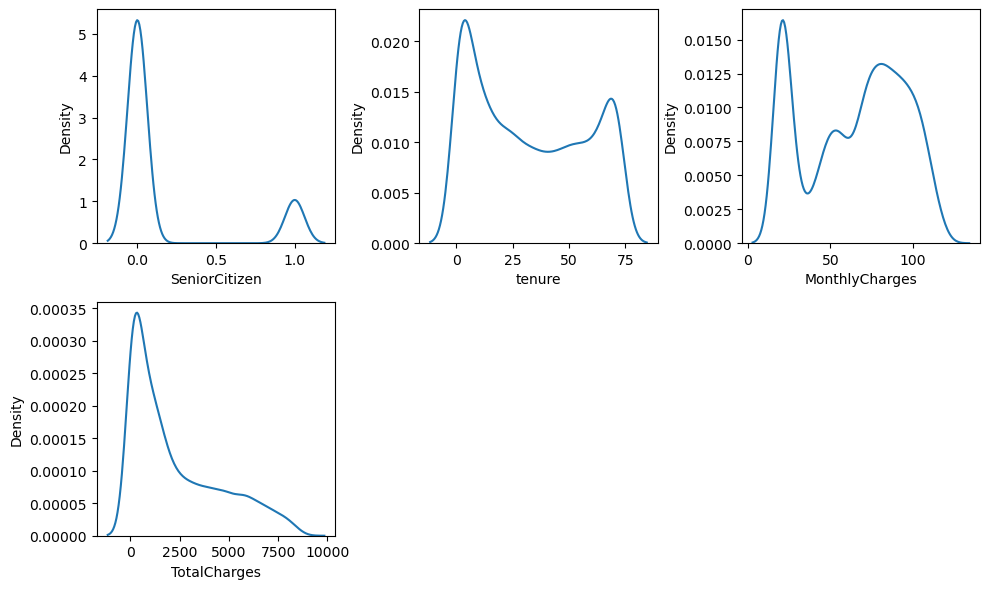

In [76]:
#Distribusi kolom categorical
plt.figure(figsize=(10,6))
features=numericals
for i in range (0, len(numericals)):
    plt.subplot(2, len(features)//2+1, i+1) #grafik 2 baris 
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Observasi:
- Lebih banyak customer yang bertahan 1-20 bulan, yang mengidentifikasi kalau cutomer bertahan dalam jangka waktu yang sebentar
- Customer lebih banyak total biayanya rendah dan semaking besar biayanya semakin sedikit customernya.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13020\3491248057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set1')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13020\3491248057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set1')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13020\3491248057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set1')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13020\3491248057.py:5: FutureWarning: 

Passing `palette` 

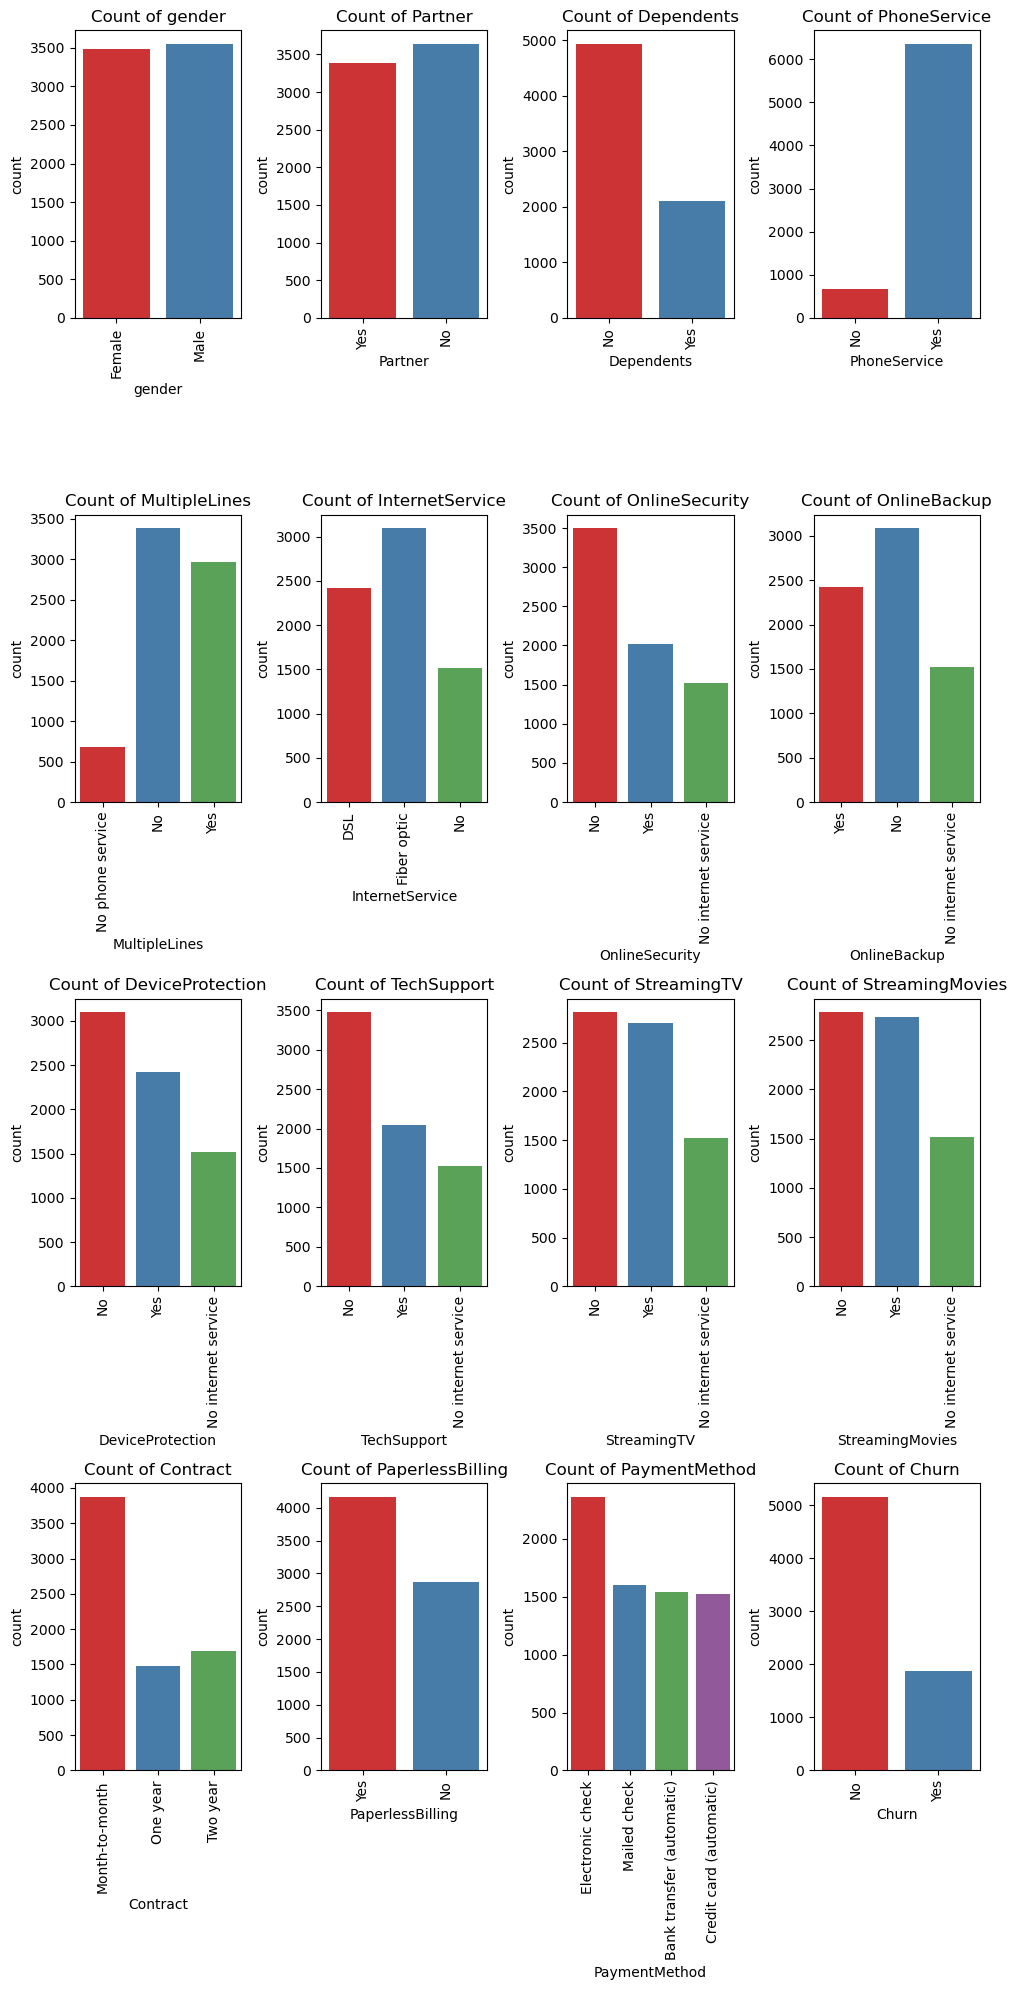

In [92]:
# Distribusi numerical columns
plt.figure(figsize=(10,20))
for i, col in enumerate(categoricals):
    plt.subplot(4,4,i+1)
    sns.countplot(data=df, x=col, palette='Set1')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Multivariate Analysis

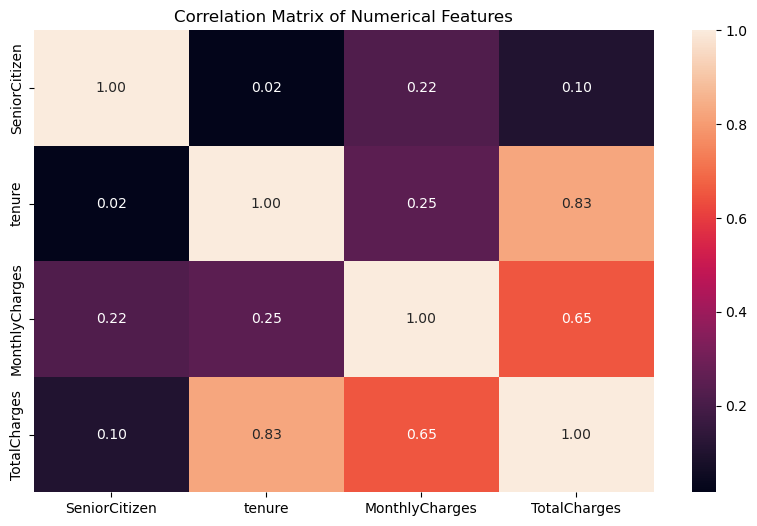

In [94]:
#Corellation
correlation=df[numericals].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Observasi:
- Tenure dengan Total Charges saling berkorelasi tinggi

In [ ]:
# 